In [225]:
#Importing libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [226]:
#Helper function to set plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [227]:
# Reading the file into a dataframe
df = pd.read_csv("data/noisypopulation.csv")

In [228]:
# Set the predictor and response variable
# Column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
x = df.x.values
f = df.f.values
y = df.y.values

This tendency of a more complex model to overfit, by having enough freedom to fit the noise, is described by something called high **variance**. What is variance?

Variance, simply put, is the "error-bar" or spread in models that would be learnt by training on different data sets $\cal{D_1}, \cal{D_2},...$ drawn from the population. Now, this seems like a circular concept, as in real-life, you do not have access to the population. But since we simulated our data here anyways, we do, and so let us see what happens if we choose **different 30 points randomly from our population of 200**, and fit models in both $\cal{H_1}$ and $\cal{H_{20}}$ to them. We do this on 200 sets of randomly chosen (from the population) data sets of 30 points each and plot the best fit models in noth hypothesis spaces for all 200 sets.

In [229]:
#Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    #Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept=False)
    
    #Fit the model to the data x and y
    lreg.fit(x, y)
    
    #Predict on the x_pred data
    y_pred = lreg.predict(x_pred)
    return lreg, y_pred

In [230]:
#Function to perform bootstrap and fit the data

# degree is the maximum degree of the model
# num_boot is the number of bootstraps
# size is the number of random points selected from the data for each bootstrap
# x is the predictor variable
# y is the response variable

def gen(degree, num_boot, size, x, y):
    
    #Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    #Run the loop for the number of bootstrap value
    for i in range(num_boot):
        
        #Helper code to call the make_predict_with_model function to fit the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        #lreg and y_pred hold the model and predicted values of the current bootstrap
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        #Append the model and predicted values into the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)
    
    #Return the 2 lists
    return predicted_values, linear_models

In [231]:
# Call the function gen twice with x and y as the predictor and response variable respectively
# The number of bootstraps should be 200 and the number of samples from the dataset should be 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(1, 200, 30, x, y);

# Get results for degree 100
predicted_100, model_100 = gen(100, 200, 30, x, y);

<Figure size 864x576 with 0 Axes>

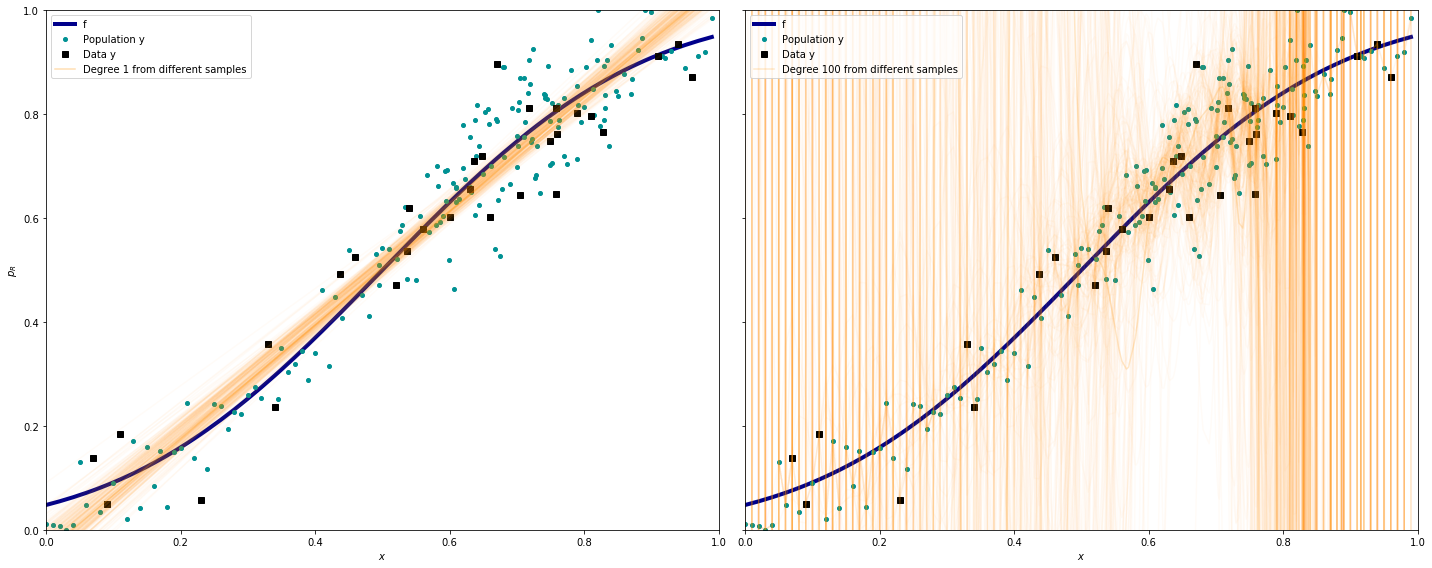

In [232]:
#Helper code to plot the data

plt.figure(figsize = (12,8))
axes=make_plot()


#Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


#Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

#edgecolor='black', linewidth=3, facecolor='green',
plt.show()